In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
 import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
result=pd.read_csv('C:/Users/DELL/Desktop/suicide-detection-60%/foreveralone.csv')

In [4]:
result

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,5/17/2016 20:04:18,Male,Straight,35,35000,White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,5/17/2016 20:04:30,Male,Bisexual,21,10000,White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,5/17/2016 20:04:58,Male,Straight,22,0,White non-Hispanic,Overweight,Yes,No,No,10.0,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,5/17/2016 20:08:01,Male,Straight,19,10000,White non-Hispanic,Overweight,Yes,Yes,No,8.0,Yes,Yes,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,5/17/2016 20:08:04,Male,Straight,23,35000,White non-Hispanic,Overweight,No,No,Yes and I have,10.0,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,06-02-2016 05:04,Female,Straight,26,15000,White non-Hispanic,Overweight,Yes,No,Yes but I haven't,10.0,Yes,No,"Set me up with a date, date coaching",No,Employed for wages,Consultant IT,Master’s degree,Joined a gym/go to the gym
465,06-03-2016 19:25,Male,Straight,31,35000,White non-Hispanic,Normal weight,No,No,Yes but I haven't,10.0,No,No,I don't want help,No,Employed for wages,castor,"High school graduate, diploma or the equivalen...","Other exercise, join clubs/socual clubs/meet ups"
466,06-06-2016 01:36,Female,Straight,17,10000,Asian,Normal weight,Yes,No,No,20.0,Yes,Yes,wingman/wingwoman,Yes,Employed for wages,receptionist,"Some high school, no diploma","Joined a gym/go to the gym, Other exercise, jo..."
467,8/14/2016 15:10:41,Male,Straight,18,0,Asian,Obese,Yes,No,No,16.0,Yes,Yes,Set me up with a date,No,Out of work but not currently looking for work,Student,"High school graduate, diploma or the equivalen...","Joined a gym/go to the gym, Therapy"


In [5]:
result.isnull().sum()

time                      0
gender                    0
sexuallity                0
age                       0
income                    0
race                      0
bodyweight                0
virgin                    0
prostitution_legal        0
pay_for_sex               0
friends                   0
social_fear               0
depressed                 0
what_help_from_others     0
attempt_suicide           0
employment                0
job_title                12
edu_level                 0
improve_yourself_how      0
dtype: int64

In [6]:
result.loc[result['depressed']=='Yes', 'depressed'] =1
result.loc[result['depressed']=='No', 'depressed'] =2

In [7]:
result.loc[result['social_fear']=='Yes', 'social_fear'] =1
result.loc[result['social_fear']=='No', 'social_fear'] =2

In [8]:
result.loc[result['virgin']=='Yes', 'virgin'] =1
result.loc[result['virgin']=='No', 'virgin'] =2

In [9]:
result.loc[result['gender']=='Male', 'gender'] =1
result.loc[result['gender']=='Female', 'gender'] =2
result.loc[result['gender']=='Transgender male', 'gender'] =1
result.loc[result['gender']=='Transgender female', 'gender'] =2

In [10]:
#result.loc[result['attempt_suicide']=='1', 'attempt_suicide'] =Yes
#result.loc[result['attempt_suicide']=='2', 'attempt_suicide'] =No

In [11]:
result.loc[result['bodyweight']=='Normal weight', 'bodyweight'] =1
result.loc[result['bodyweight']=='Underweight', 'bodyweight'] =2
result.loc[result['bodyweight']=='Overweight', 'bodyweight'] =3
result.loc[result['bodyweight']=='Obese', 'bodyweight'] =4

In [12]:
result

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,5/17/2016 20:04:18,1,Straight,35,35000,White non-Hispanic,1,1,No,No,0.0,1,1,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,5/17/2016 20:04:30,1,Bisexual,21,10000,White non-Hispanic,2,1,No,No,0.0,1,1,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,5/17/2016 20:04:58,1,Straight,22,0,White non-Hispanic,3,1,No,No,10.0,1,1,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,5/17/2016 20:08:01,1,Straight,19,10000,White non-Hispanic,3,1,Yes,No,8.0,1,1,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,5/17/2016 20:08:04,1,Straight,23,35000,White non-Hispanic,3,2,No,Yes and I have,10.0,2,1,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,06-02-2016 05:04,2,Straight,26,15000,White non-Hispanic,3,1,No,Yes but I haven't,10.0,1,2,"Set me up with a date, date coaching",No,Employed for wages,Consultant IT,Master’s degree,Joined a gym/go to the gym
465,06-03-2016 19:25,1,Straight,31,35000,White non-Hispanic,1,2,No,Yes but I haven't,10.0,2,2,I don't want help,No,Employed for wages,castor,"High school graduate, diploma or the equivalen...","Other exercise, join clubs/socual clubs/meet ups"
466,06-06-2016 01:36,2,Straight,17,10000,Asian,1,1,No,No,20.0,1,1,wingman/wingwoman,Yes,Employed for wages,receptionist,"Some high school, no diploma","Joined a gym/go to the gym, Other exercise, jo..."
467,8/14/2016 15:10:41,1,Straight,18,0,Asian,4,1,No,No,16.0,1,1,Set me up with a date,No,Out of work but not currently looking for work,Student,"High school graduate, diploma or the equivalen...","Joined a gym/go to the gym, Therapy"


In [13]:
result.dropna()

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,5/17/2016 20:04:18,1,Straight,35,35000,White non-Hispanic,1,1,No,No,0.0,1,1,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,5/17/2016 20:04:30,1,Bisexual,21,10000,White non-Hispanic,2,1,No,No,0.0,1,1,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,5/17/2016 20:04:58,1,Straight,22,0,White non-Hispanic,3,1,No,No,10.0,1,1,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,5/17/2016 20:08:01,1,Straight,19,10000,White non-Hispanic,3,1,Yes,No,8.0,1,1,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,5/17/2016 20:08:04,1,Straight,23,35000,White non-Hispanic,3,2,No,Yes and I have,10.0,2,1,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,06-02-2016 05:04,2,Straight,26,15000,White non-Hispanic,3,1,No,Yes but I haven't,10.0,1,2,"Set me up with a date, date coaching",No,Employed for wages,Consultant IT,Master’s degree,Joined a gym/go to the gym
465,06-03-2016 19:25,1,Straight,31,35000,White non-Hispanic,1,2,No,Yes but I haven't,10.0,2,2,I don't want help,No,Employed for wages,castor,"High school graduate, diploma or the equivalen...","Other exercise, join clubs/socual clubs/meet ups"
466,06-06-2016 01:36,2,Straight,17,10000,Asian,1,1,No,No,20.0,1,1,wingman/wingwoman,Yes,Employed for wages,receptionist,"Some high school, no diploma","Joined a gym/go to the gym, Other exercise, jo..."
467,8/14/2016 15:10:41,1,Straight,18,0,Asian,4,1,No,No,16.0,1,1,Set me up with a date,No,Out of work but not currently looking for work,Student,"High school graduate, diploma or the equivalen...","Joined a gym/go to the gym, Therapy"


In [14]:
y=result['attempt_suicide']
x=result[['age','friends','depressed','social_fear','virgin','gender','income','bodyweight']]
print(x)


     age  friends depressed social_fear virgin gender  income bodyweight
0     35      0.0         1           1      1      1   35000          1
1     21      0.0         1           1      1      1   10000          2
2     22     10.0         1           1      1      1       0          3
3     19      8.0         1           1      1      1   10000          3
4     23     10.0         1           2      2      1   35000          3
..   ...      ...       ...         ...    ...    ...     ...        ...
464   26     10.0         2           1      1      2   15000          3
465   31     10.0         2           2      2      1   35000          1
466   17     20.0         1           1      1      2   10000          1
467   18     16.0         1           1      1      1       0          4
468   28      3.0         1           1      1      1  145500          1

[469 rows x 8 columns]


In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0)


In [16]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x, y)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
y_pred_class = clf.predict(X_test)

print("Training Accuracy: ",clf.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True))

Training Accuracy:  0.9914529914529915
Test Accuracy:  1.0


In [19]:
import sklearn.metrics

In [20]:
print(sklearn.metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       101
         Yes       1.00      1.00      1.00        17

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



In [21]:
y_pred = clf.predict(X_test )
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[101,   0],
       [  0,  17]], dtype=int64)

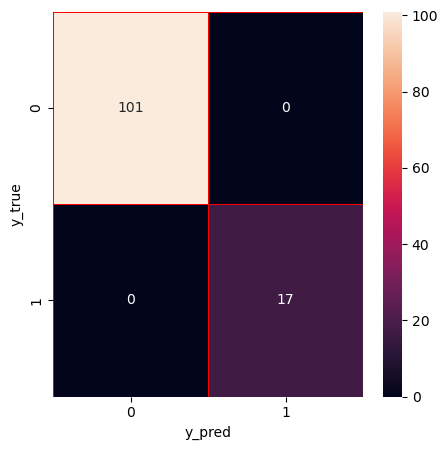

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:

classifier = RandomForestClassifier(n_estimators=10, random_state=0)
classifier.fit(x, y)

RandomForestClassifier(n_estimators=10, random_state=0)

In [27]:
classifier.score(x,y)

0.9594882729211087

In [29]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test )
accuracy_score(y_pred,y_test)

0.9661016949152542

In [30]:
import sklearn.metrics

In [31]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.96      1.00      0.98       101
         Yes       1.00      0.76      0.87        17

    accuracy                           0.97       118
   macro avg       0.98      0.88      0.92       118
weighted avg       0.97      0.97      0.96       118



In [32]:
y_pred = classifier.predict(X_test )
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[101,   0],
       [  4,  13]], dtype=int64)

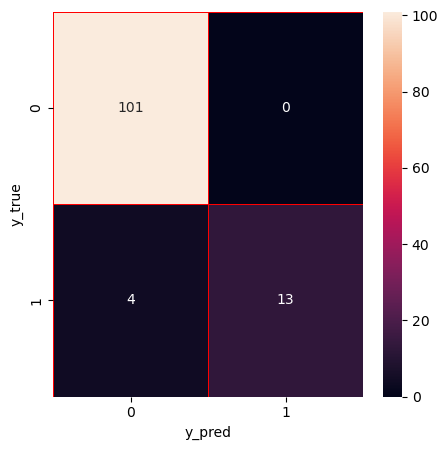

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [35]:
from sklearn.linear_model import LogisticRegression
for i in range(0, 20):
    X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0)
    
    # creating Logistic Regression classifier
    clf = LogisticRegression(random_state=i)
    clf.fit(x,y)
    
    # determining the score
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("Test: {}, Train: {} and Random State: {}".format(test_score, train_score, i))

Test: 0.8559322033898306, Train: 0.8062678062678063 and Random State: 0
Test: 0.8559322033898306, Train: 0.8062678062678063 and Random State: 1
Test: 0.8559322033898306, Train: 0.8062678062678063 and Random State: 2
Test: 0.8559322033898306, Train: 0.8062678062678063 and Random State: 3
Test: 0.8559322033898306, Train: 0.8062678062678063 and Random State: 4
Test: 0.8559322033898306, Train: 0.8062678062678063 and Random State: 5
Test: 0.8559322033898306, Train: 0.8062678062678063 and Random State: 6
Test: 0.8559322033898306, Train: 0.8062678062678063 and Random State: 7
Test: 0.8559322033898306, Train: 0.8062678062678063 and Random State: 8
Test: 0.8559322033898306, Train: 0.8062678062678063 and Random State: 9
Test: 0.8559322033898306, Train: 0.8062678062678063 and Random State: 10
Test: 0.8559322033898306, Train: 0.8062678062678063 and Random State: 11
Test: 0.8559322033898306, Train: 0.8062678062678063 and Random State: 12
Test: 0.8559322033898306, Train: 0.8062678062678063 and Rando

In [36]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x,y)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [40]:

yhat = LR.predict(X_test)



In [42]:
confusion_matrix(yhat,y_test)

array([[101,  17],
       [  0,   0]], dtype=int64)

In [44]:
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

          No       0.86      1.00      0.92       101
         Yes       0.00      0.00      0.00        17

    accuracy                           0.86       118
   macro avg       0.43      0.50      0.46       118
weighted avg       0.73      0.86      0.79       118



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(x,y)

# Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [23]:
import pickle

pickle.dump(clf,open('suicide.pkl','wb'))
suicide = pickle.load(open('suicide.pkl','rb'))